# HW2_1

###  R for Data Science 의 flight 데이터를 dplyr과 ggplot을 활용하여 시각화시키고, 해당 그래프를 요약하는 한 문장의 설명을 달 것

##### 목표 : 그림은 이쁘게, 설명은 그림을 명확하게 설명할 수 있도록

### 1. data 전처리

In [154]:
#install.packages("nycflights13")
library(nycflights13)
library(ggplot2) # ggplot() for plotting
library(dplyr) # data reformatting
library(tidyr) # data reformatting
library(stringr) # string manipulation

In [39]:
unique(flights$origin)
unique(flights$dest)

[1] "EWR" "LGA" "JFK"

[1] "IAH" "MIA" "BQN" "ATL" "ORD" "FLL" "IAD" "MCO" "PBI" "TPA" "LAX" "SFO"
 [13] "DFW" "BOS" "LAS" "MSP" "DTW" "RSW" "SJU" "PHX" "BWI" "CLT" "BUF" "DEN"
 [25] "SNA" "MSY" "SLC" "XNA" "MKE" "SEA" "ROC" "SYR" "SRQ" "RDU" "CMH" "JAX"
 [37] "CHS" "MEM" "PIT" "SAN" "DCA" "CLE" "STL" "MYR" "JAC" "MDW" "HNL" "BNA"
 [49] "AUS" "BTV" "PHL" "STT" "EGE" "AVL" "PWM" "IND" "SAV" "CAK" "HOU" "LGB"
 [61] "DAY" "ALB" "BDL" "MHT" "MSN" "GSO" "CVG" "BUR" "RIC" "GSP" "GRR" "MCI"
 [73] "ORF" "SAT" "SDF" "PDX" "SJC" "OMA" "CRW" "OAK" "SMF" "TUL" "TYS" "OKC"
 [85] "PVD" "DSM" "PSE" "BHM" "CAE" "HDN" "BZN" "MTJ" "EYW" "PSP" "ACK" "BGR"
 [97] "ABQ" "ILM" "MVY" "SBN" "LEX" "CHO" "TVC" "ANC" "LGA"

In [151]:
sum(is.na(flights))
flights1 <- na.omit(flights)
flights2 <- flights1 %>% 
            select(month, ends_with("delay"),origin,dest) %>%
            filter(dest=="ORD"|dest=="BOS"|dest=="BTV"|dest=="CAE"|dest=="GRR"|dest=="STT"|
                   dest=="DAY"|dest=="ALB"|dest=="CHO"|dest=="LGA"|dest=="AVL"|dest=="RDU"|
                   dest=="IAH"|dest=="SMF"|dest=="MEM"|dest=="EGE"|dest=="SFO"|dest=="HDN") %>%
            group_by(month, origin, dest) %>% 
            summarise(dep_delay_m = mean(dep_delay, na.rm=T),
                      arr_delay_m = mean(arr_delay, na.rm=T)) %>%
            mutate(depfactor = cut(dep_delay_m, breaks = c(-30, 0, 20, 40, 60, max(dep_delay_m,na.rm=T)),
                                                labels = c("<0","0-20","20-40","40-60",">60"))) %>%
            mutate(depfactor=factor(as.character(depfactor),levels=rev(levels(depfactor)))) %>%
            mutate(arrfactor = cut(arr_delay_m, breaks = c(-30, 0, 20, 40, 60, max(arr_delay_m,na.rm=T)),
                                                labels = c("<0","0-20","20-40","40-60",">60"))) %>%
            mutate(arrfactor=factor(as.character(arrfactor),levels=rev(levels(arrfactor)))) %>%
            as.data.frame %>%
            mutate(origin = factor(origin)) %>%
            mutate(dest = factor(dest))

head(flights2)

[1] 46595

month,origin,dest,dep_delay_m,arr_delay_m,depfactor,arrfactor
1,EWR,ALB,41.396825,35.1746032,40-60,20-40
1,EWR,AVL,25.500000,23.5000000,20-40,20-40
1,EWR,BOS,8.985915,-0.8122066,0-20,<0
1,EWR,BTV,20.673469,16.1938776,20-40,0-20
1,EWR,CAE,40.750000,55.8750000,40-60,40-60
1,EWR,DAY,27.753425,30.6712329,20-40,20-40


----------------------------------

### 2. 출발지와 도착지에 따른 월별 출발지연시간

> **그래프는 출발지와 도착지에 따른 월별 출발지연시간을 나타낸 그래프입니다.**

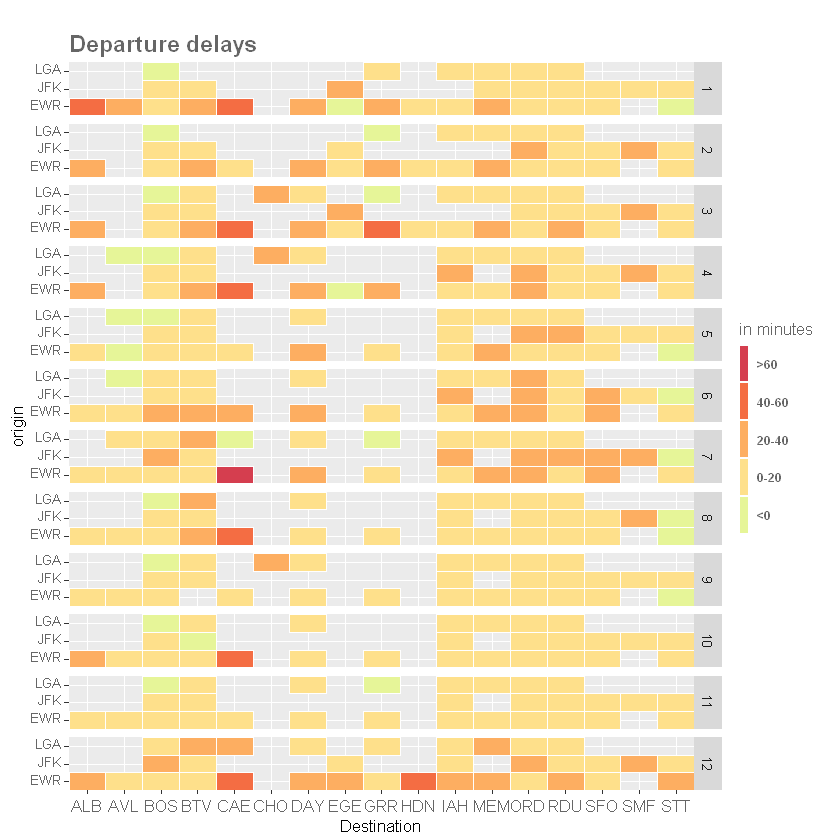

In [157]:
# assign text colour
textcol <- "grey40"

# further modified ggplot
ggplot(flights2,aes(x=dest,y=origin,fill=depfactor))+
   facet_grid( month ~. ) +
  geom_tile(colour="white",size=0.2)+
  guides(fill=guide_legend(title="in minutes"))+
  labs(x="Destination",y="origin",title="Departure delays")+
  scale_y_discrete(expand=c(0,0))+
  scale_x_discrete(expand=c(0,0))+
  scale_fill_manual(values=c("#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#ddf1da"))+
  #coord_fixed()+
#set a base size for all fonts
  theme_grey(base_size=10)+
#theme options
  theme(legend.position="right",legend.direction="vertical",
        legend.title=element_text(colour=textcol),
        legend.margin=margin(grid::unit(0,"cm")),
        #bold font for legend text
        legend.text=element_text(colour=textcol,size=7,face="bold"),
        legend.key.height=grid::unit(0.8,"cm"),
        legend.key.width=grid::unit(0.2,"cm"),
        axis.text.x=element_text(size=10,colour=textcol),
        axis.text.y=element_text(vjust=0.2,colour=textcol),
        #set thickness of axis ticks
        axis.ticks=element_line(size=0.4),
        #remove plot background
        plot.background=element_blank(),
        #remove plot border
        panel.border=element_blank(),
        plot.margin=margin(0.7,0.4,0.1,0.2,"cm"),
        plot.title=element_text(colour=textcol,hjust=0,size=14,face="bold"))

> 오른쪽 열은 월이고, 왼쪽 열은 출발지이며 행은 도착지입니다. 또한 그래프의 색깔이 진할수록 오래 지연됨을 의미합니다. 
   * 7월에 출발지가 "EWR"이고 도착지가 "CAE"인 비행기는 평균 1시간 이상 지연되었이며 "STT"로 가는 비행기는 일찍 출발하는 경우도 종종 있습니다. 
   * 대체적으로 8월부터 12월까지 보다 1월부터 7월까지 지연시간이 오래 걸렸습니다.
   * 도착지가 "BOS","IAH","ORD","RDU"인 비행기는 자주 운행하지만 도착지가 "CHO","HDN"인 비행기는 일년에 3~4달 정도 운행하였습니다.

----------------------------------------------------

### 3. 출발지와 도착지에 따른 월별 도착지연시간

> **그래프는 출발지와 도착지에 따른 월별 도착지연시간을 나타낸 그래프입니다.**

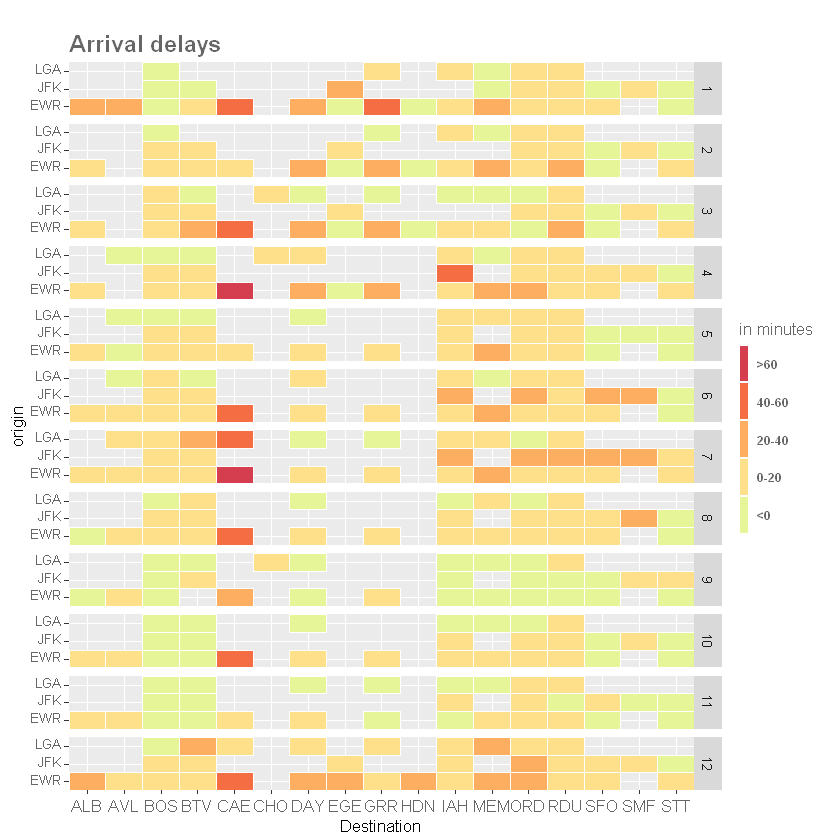

In [159]:
library(RColorBrewer)
# assign text colour
textcol <- "grey40"

# further modified ggplot
ggplot(flights2,aes(x=dest,y=origin,fill=arrfactor))+
   facet_grid( month ~. ) +
  geom_tile(colour="white",size=0.2)+
  guides(fill=guide_legend(title="in minutes"))+
  labs(x="Destination",y="origin",title="Arrival delays")+
  scale_y_discrete(expand=c(0,0))+
  scale_x_discrete(expand=c(0,0))+
   scale_fill_manual(values=c("#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#ddf1da"))+                     
#  scale_fill_manual(values=rev(brewer.pal(7,"YlGnBu")))+
  #coord_fixed()+
#set a base size for all fonts
  theme_grey(base_size=10)+
#theme options
  theme(legend.position="right",legend.direction="vertical",
        legend.title=element_text(colour=textcol),
        legend.margin=margin(grid::unit(0,"cm")),
        #bold font for legend text
        legend.text=element_text(colour=textcol,size=7,face="bold"),
        legend.key.height=grid::unit(0.8,"cm"),
        legend.key.width=grid::unit(0.2,"cm"),
        axis.text.x=element_text(size=10,colour=textcol),
        axis.text.y=element_text(vjust=0.2,colour=textcol),
        #set thickness of axis ticks
        axis.ticks=element_line(size=0.4),
        #remove plot background
        plot.background=element_blank(),
        #remove plot border
        panel.border=element_blank(),
        plot.margin=margin(0.7,0.4,0.1,0.2,"cm"),
        plot.title=element_text(colour=textcol,hjust=0,size=14,face="bold"))

> 오른쪽 열은 월이고, 왼쪽 열은 출발지이며 행은 도착지입니다. 또한 그래프의 색깔이 진할수록 오래 지연됨을 의미합니다. 
   * 7월에 출발지가 "EWR"이고 도착지가 "CAE"인 비행기는 평균 1시간 이상 지연되었이며 "STT"로 가는 비행기는 일찍 도착하는 경우도 많이 있지만 "CAE"로 도착하는 비행기는 제 시간에 도착하는 경우가 많이 없었습니다.
   * 대체적으로 9,10,11월달이 다른 달에 비해 일찍 도착하는 경우가 많이 있습니다. 
   * 도착지가 "BOS","IAH","ORD","RDU"인 비행기는 자주 운행하지만 도착지가 "CHO","HDN"인 비행기는 일년에 3~4달 정도 운행하였습니다.